# Pengumpulan Data

1.) Data yang digunakan yaitu dataset klasifikasi penyakit jantung yang dapat diakses di UCI melalui link: 
https://archive.ics.uci.edu/dataset/45/heart+disease . 

2.) Didalam dataset klasifikasi penyakit jantung, terdapat 4 database diantaranya adalah Hungarian, Cleveland, switzerland, VA-Long beach.
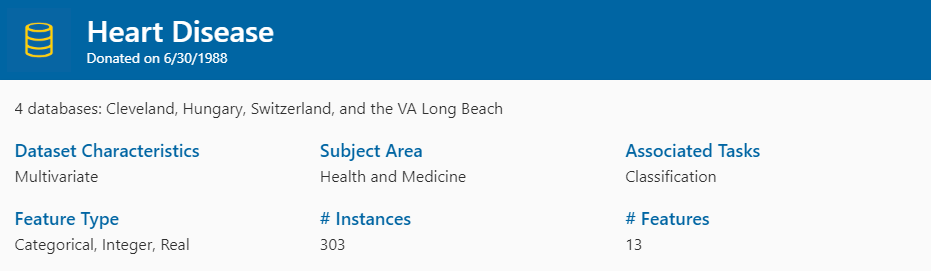

3.) Pada Penugasan Minggu 1 ini, dataset yang digunakan yaitu "Hungarian Data". Dataset terdiri dari 14 feature sebagai berikut:
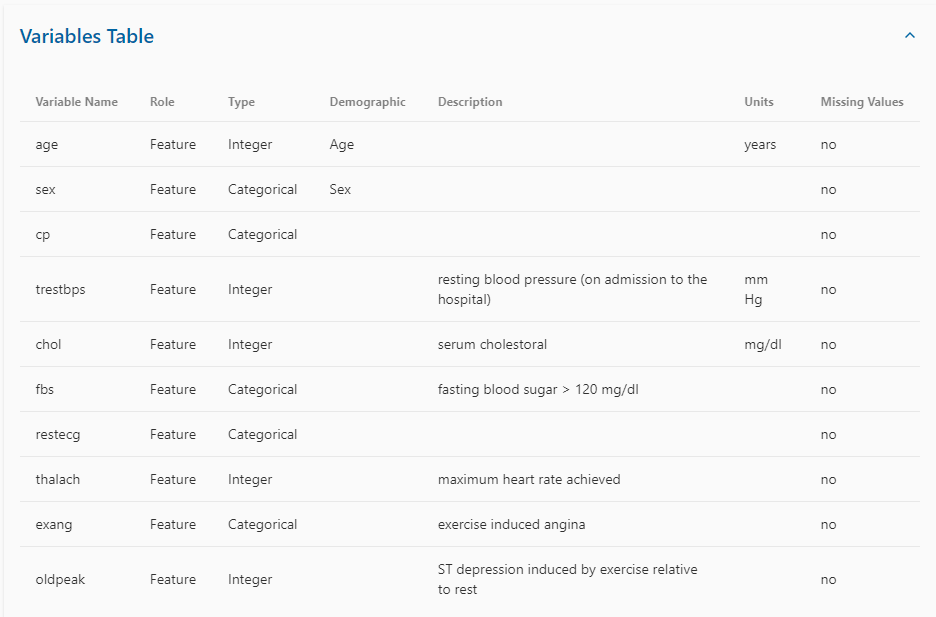
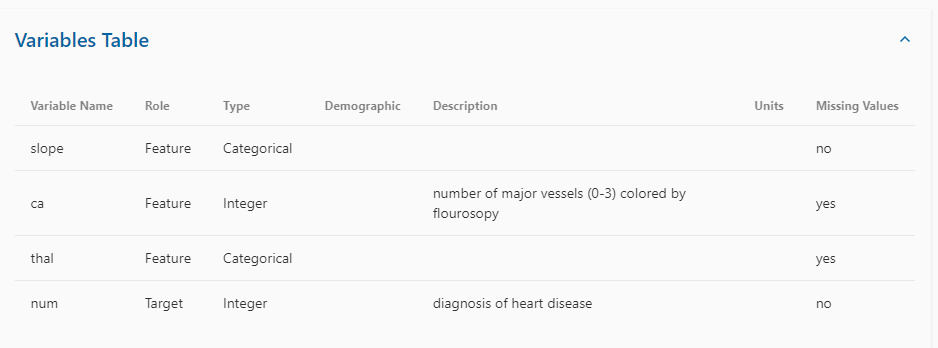


# Menelaah Data

Import library yang akan digunakan

In [2]:
import pandas as pd
import numpy as np
import re
import itertools

# Load Data

menginput dataset dan menyimpannya ke dalam variable "df"

In [3]:
data = 'hungarian.data'

membaca dataset

In [4]:
with open(data, encoding='Latin1') as file:
    lines = [line.strip() for line in file]
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

setelah membaca file dataset, dilakukan perulangan sebanyak kolom dan baris yang ada dalam dataset tersebut

In [5]:
data2 = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

In [6]:
df = pd.DataFrame.from_records(data2)

In [7]:
df.head() #menampilkan 5 data teratas

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [8]:
df.info() #menampilkan info yang ada pada dataset (jumlah kolom, jumlah missing values, tipe data, range-index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

 sebelum masuk ke dalam tahap validasi data, perlu dilakukannya penghapusan fitur untuk data bertipe object atau string.

In [9]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

tipe data pada file dataset diubah menjadi tipe data float. pada dataset, angka -9.0 mewakili nilai null.

In [10]:
df = df.astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

# Validasi Data

tahapan untuk mengetahui dan memahami isi dataset sehingga dapat melakukan tahapan berdasarkan kondisi

In [12]:
# data dengan nilai -9.0 dirubah menjadi null value sesuai dengan deskripsi pada dataset
df.replace(-9.0, np.nan, inplace=True)

In [13]:
df.isnull().sum() #menghitung jumlah null value

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [14]:
df.head

<bound method NDFrame.head of       1     2    3    4    5    6   7    8      9    10  ...  65   66   67  \
0    0.0  40.0  1.0  1.0  0.0  0.0 NaN  2.0  140.0  0.0  ... NaN  NaN  NaN   
1    0.0  49.0  0.0  1.0  0.0  0.0 NaN  3.0  160.0  1.0  ... NaN  NaN  NaN   
2    0.0  37.0  1.0  1.0  0.0  0.0 NaN  2.0  130.0  0.0  ... NaN  NaN  NaN   
3    0.0  48.0  0.0  1.0  1.0  1.0 NaN  4.0  138.0  0.0  ... NaN  2.0  NaN   
4    0.0  54.0  1.0  1.0  0.0  1.0 NaN  3.0  150.0  0.0  ... NaN  1.0  NaN   
..   ...   ...  ...  ...  ...  ...  ..  ...    ...  ...  ...  ..  ...  ...   
289  0.0  48.0  0.0  0.0  0.0  0.0 NaN  2.0    NaN  0.0  ... NaN  NaN  NaN   
290  0.0  36.0  1.0  1.0  0.0  0.0 NaN  2.0  120.0  0.0  ... NaN  NaN  NaN   
291  0.0  48.0  1.0  0.0  0.0  0.0 NaN  3.0  110.0  0.0  ... NaN  NaN  NaN   
292  0.0  47.0  0.0  0.0  0.0  0.0 NaN  2.0  140.0  1.0  ... NaN  NaN  NaN   
293  0.0  53.0  1.0  1.0  1.0  1.0 NaN  4.0  130.0  0.0  ... NaN  1.0  1.0   

      68   69   70   71   72  73 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

# Menentukan Object Data

memilih 14 feature yang akan digunakan berdasarkan pada deskripsi dataset

In [16]:
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 39, 42, 49, 56]]

In [17]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,NaN,NaN,NaN,0.0


In [18]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   40      104 non-null    float64
 10  43      4 non-null      float64
 11  50      28 non-null     float64
 12  57      294 non-null    float64
dtypes: float64(13)
memory usage: 30.0 KB


In [19]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

In [20]:
df_selected.rename(columns=column_mapping, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_5404\3799284956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [21]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   slope     104 non-null    float64
 10  ca        4 non-null      float64
 11  thal      28 non-null     float64
 12  target    294 non-null    float64
dtypes: float64(13)
memory usage: 30.0 KB


In [22]:
df_selected.value_counts() #menghitung jumlah feature dataset

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    2.0    0.0  7.0   1.0       1
dtype: int64

# Membersihkan Data

melakukan cleaning data sebelum dilakukan pemodelan

In [23]:
df_selected.isnull().sum() #menghitung jumlah null values yang ada diddalam dataset

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
slope       190
ca          290
thal        266
target        0
dtype: int64

melakukan drop kolom jika data pada suatu feature terdapat missing values dengan jumlah -+ 90%

In [24]:
columns_to_drop = ['ca', 'slope','thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [25]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
target       0
dtype: int64

mengisi missing value di beberapa feature menggunakan mean dari setiap kolom

In [26]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

In [27]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [28]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

In [29]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [30]:
dfClean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   target    294 non-null    float64
dtypes: float64(10)
memory usage: 23.1 KB


In [31]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
target      0
dtype: int64

In [32]:
#melakukan pengecekan duplikasi data
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0


In [33]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0


In [34]:
#penghapusan data yang memiliki duplikat
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target


In [35]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0


In [36]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

# Import Library

In [37]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
dfClean.corr() #menacri korelasi antar feature

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.571710
target,0.210429,0.220732,0.427536,0.214898,0.256027,0.154319,0.042643,-0.367525,0.571710,1.000000


<AxesSubplot:>

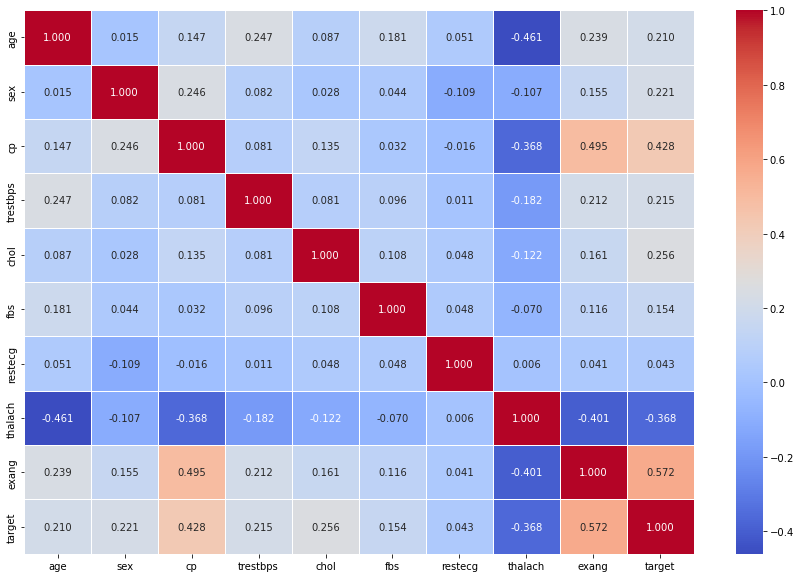

In [40]:
#membuat visualisasi
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f", cmap='coolwarm')

# Kontruksi Data


Kontruksi data dilakukan untuk menyesuaikan tipe data yang ada dalam dataset. Pada dataset ini tidak perlu melakukan kontruksi data karena tipe datanya sudah sesuai.

In [41]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   target    293 non-null    float64
dtypes: float64(10)
memory usage: 25.2 KB


In [42]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0


Memisahkan fitur dan target dan menyimpannya ke dalam variable setelah menyesuikan tipe dataset yang digunakan

In [43]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

Melakukan pengecekan persebaran jumlah target

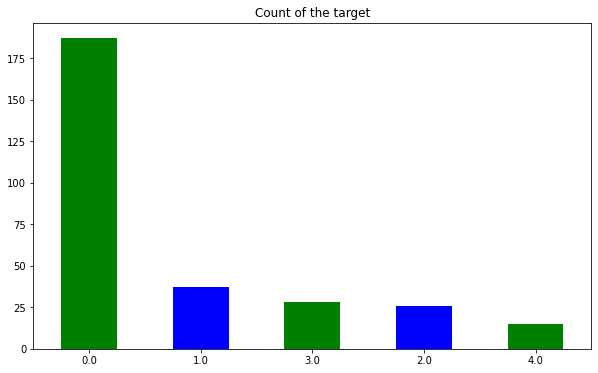

In [44]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

Hasil yang ditunjukan oleh grafik yaitu tidak seimbangnya persebaran jumlah target sehingga perlu diseimbangkan. Ada dua cara dalam menyeimbangkan target:

- Oversampling : dilakukan jika jumlah datanya terlalu sedikit.

- Undersampling : dilakukan jika jumlah datanya terlalu banyak.

Karena jumlah data yang digunakan terlalu sedikit, perlu dilakukan penyeimbangan data berupa oversampling dengan menggunakan metode SMOTE.

In [45]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

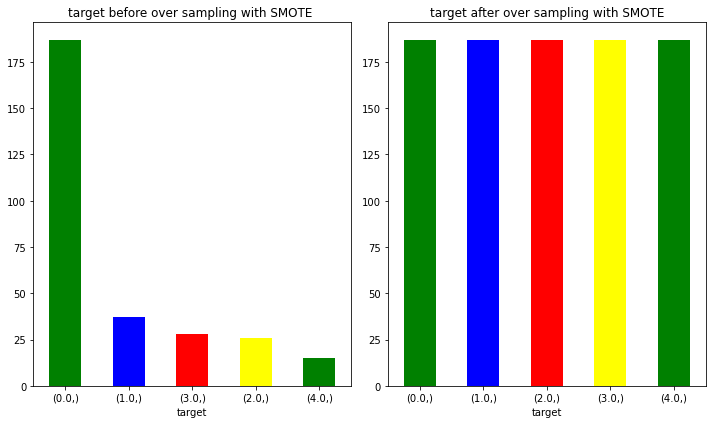

In [48]:
plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)

new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

In [49]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [50]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

Melakukan pengecekan hasil persebaran target

In [51]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,4.000000


Melakukan normalisasi atau standarisasi untuk memperkecil rentang antara standar deviasi tiap kolom. Disebabkan karena hasil dari deskripsi menunjukan rentang nilai yang cukup jauh dari standar deviasi pada tiap kolom.

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

In [53]:
len(X_smote_resampled_normal)

935

In [54]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563277,0.842507,0.818224,0.403456,0.340936,0.094277,0.118174,0.453750,0.596674
std,0.174820,0.332492,0.274211,0.147463,0.111034,0.252030,0.199697,0.196784,0.450334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267481,0.000000,0.000000,0.312720,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.956396
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.207561,0.593629,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Membagi fitur dan target menjadi data training dan data testing

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

In [57]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

# Membangun Model

Menampilkan hasil akurasi dan mean dari recall, f1 score, serta precision score dari tiap model. (sifatnya optional)

In [58]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score


In [59]:
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={
             'accuracy': round(acc,3),
             'recall': round(rcl,3),
             'F1 score': round(f1,3),
             'Precision score': round(ps,3)
    }
    return print(metric_dict)

# Oversample

# KNN

Model yang dibangun yaitu menggunakan algoritma KNN dengan nilai K = 3

In [60]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [62]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Menampilkan hasil akurasi KNN dengan nilai K = 3

In [63]:
y_pred_knn = knn_model.predict(X_test)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.738
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.37      0.47        38
         1.0       0.73      0.81      0.77        37
         2.0       0.78      0.86      0.82        37
         3.0       0.73      0.87      0.80        38
         4.0       0.76      0.78      0.77        37

    accuracy                           0.74       187
   macro avg       0.73      0.74      0.72       187
weighted avg       0.73      0.74      0.72       187



In [64]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.738, 'recall': 0.738, 'F1 score': 0.724, 'Precision score': 0.729}


Visualisasi confusion matrix yang berfungsi untuk membandingan hasil prediksi pada model dengan nilai sebenarnya

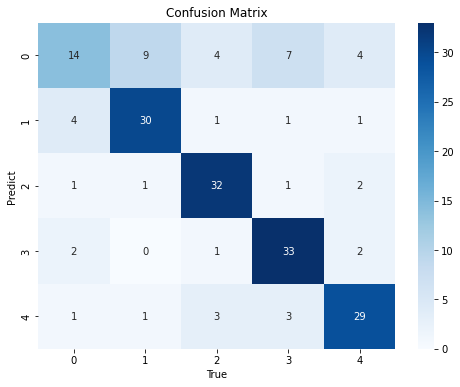

In [65]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Random Forest

Membangun model menggunakan algoritma random forest dengan n_estimators = 100.

- n_estimators : gunanya untuk mengatur jumlah pohon keputusan yang akan dibangun

In [66]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        38
         1.0       0.86      0.84      0.85        37
         2.0       0.87      0.92      0.89        37
         3.0       0.95      0.92      0.93        38
         4.0       0.97      0.95      0.96        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [68]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.905}


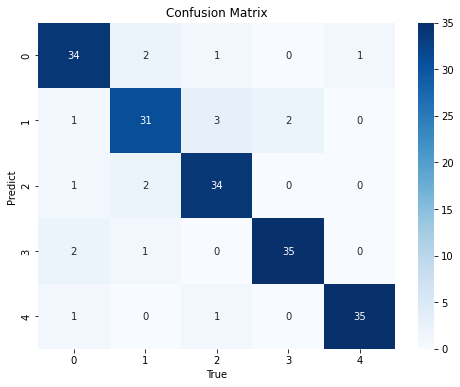

In [69]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# XGBoost

Membangun model degan menggunakan algoritma XGBoost dengan learning rate = 0.1

- learning rate : gunanya untuk mengontrol seberapa besar kita menyesuaikan bobot model

In [70]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [71]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        38
         1.0       0.91      0.84      0.87        37
         2.0       0.86      0.86      0.86        37
         3.0       0.92      0.92      0.92        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [72]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.898, 'Precision score': 0.9}


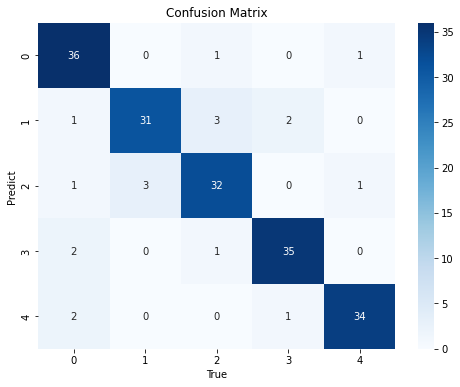

In [73]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Oversample dan Normalisasi

Melakukan modeling menggunakan data yang sudah dilakukan oversample dan normalisasi dan menampilkan visualisasi hasil evaluasinya.

- Algoritma yang digunakan : KNN, Random Forest, XGBoost

# KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [75]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [76]:
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82        38
         1.0       0.74      0.78      0.76        37
         2.0       0.77      0.89      0.82        37
         3.0       1.00      0.84      0.91        38
         4.0       0.87      0.89      0.88        37

    accuracy                           0.84       187
   macro avg       0.85      0.84      0.84       187
weighted avg       0.85      0.84      0.84       187



In [77]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.84, 'recall': 0.84, 'F1 score': 0.841, 'Precision score': 0.848}


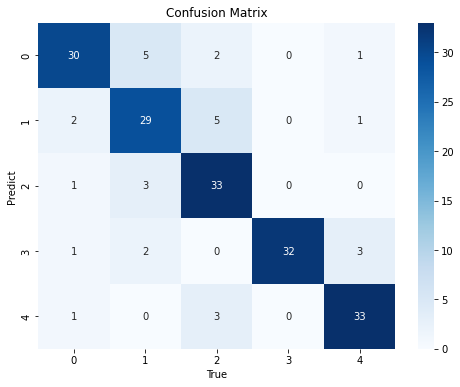

In [78]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Random Forest

In [79]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [80]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        38
         1.0       0.84      0.84      0.84        37
         2.0       0.87      0.92      0.89        37
         3.0       0.95      0.92      0.93        38
         4.0       0.97      0.95      0.96        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [81]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.899, 'Precision score': 0.899}


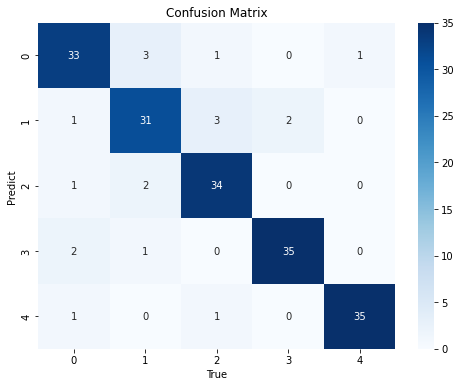

In [82]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# XGBOOST

In [83]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [84]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        38
         1.0       0.91      0.84      0.87        37
         2.0       0.86      0.86      0.86        37
         3.0       0.92      0.92      0.92        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [85]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.898, 'Precision score': 0.9}


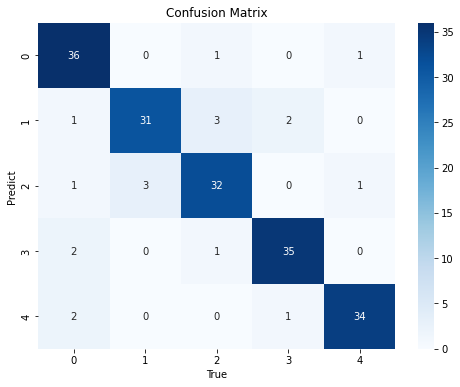

In [86]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Tunning, Normalisasi, Oversample

Membuat model menggunakan dataset yang sudah dilakukan tunning parameter, normalisasi dan oversample.

- Algoritma yang digunakan : KNN. Random Forest, XGBoost

# KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Setiap parameter tunning tidak selalu sama karena bergantung pada algoritma yang digunakan

In [88]:
knn_model = KNeighborsClassifier()

param_grid = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"],
"weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"],
"leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

In [89]:
knn_model.fit(X_train_normal, y_train_normal)
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 56, 'algorithm': 'auto'}


In [90]:
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.909
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.83      0.81      0.82        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.89      0.93        38
         4.0       0.88      1.00      0.94        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [91]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.909, 'recall': 0.909, 'F1 score': 0.909, 'Precision score': 0.911}


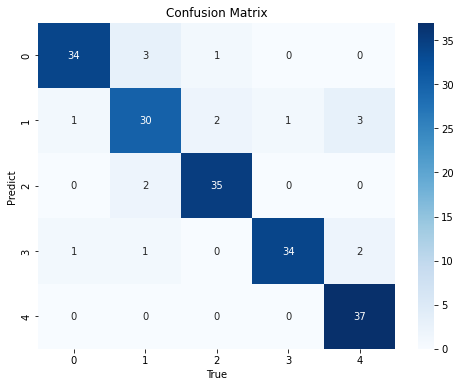

In [92]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Random Forest

In [93]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
# "random_state": [42, 100, 200]
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [94]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.893
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.86      0.84      0.85        37
         2.0       0.84      0.86      0.85        37
         3.0       0.95      0.92      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



In [95]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.893, 'recall': 0.893, 'F1 score': 0.893, 'Precision score': 0.894}


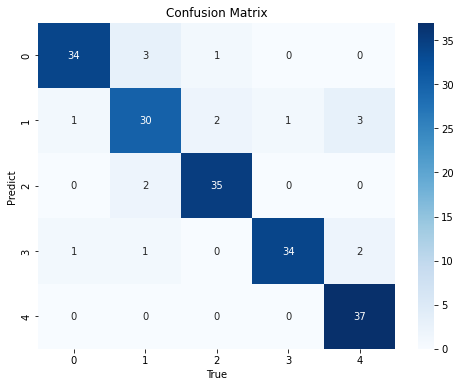

In [96]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# XGBOOST

In [97]:
xgb_model = XGBClassifier()
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

In [98]:
xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [99]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.872
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86        38
         1.0       0.88      0.81      0.85        37
         2.0       0.86      0.84      0.85        37
         3.0       0.97      0.84      0.90        38
         4.0       0.85      0.95      0.90        37

    accuracy                           0.87       187
   macro avg       0.88      0.87      0.87       187
weighted avg       0.88      0.87      0.87       187



In [100]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.872, 'recall': 0.872, 'F1 score': 0.872, 'Precision score': 0.876}


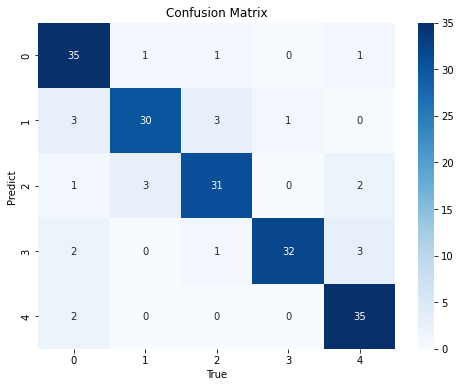

In [101]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Evaluasi

Melakukan evaluasi dan membandingkan ketiga algoritma (KNN, Random Forest, XGBoost) untuk mencari algoritma yang menghasilkan akurasi terbaik

In [102]:
import matplotlib.pyplot as plt

In [103]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                                      'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
                                        accuracy_rf_smote*100,accuracy_xgb_smote*100]})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,73.8
1,Random Forest,90.4
2,XGBoost,89.8


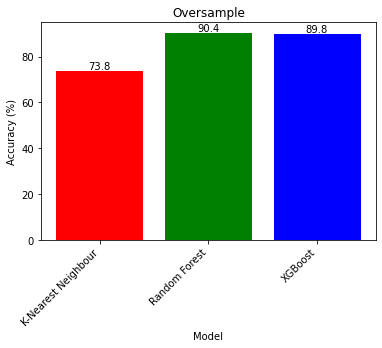

In [104]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [105]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                                      'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
                                        accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,84.0
1,Random Forest,89.8
2,XGBoost,89.8


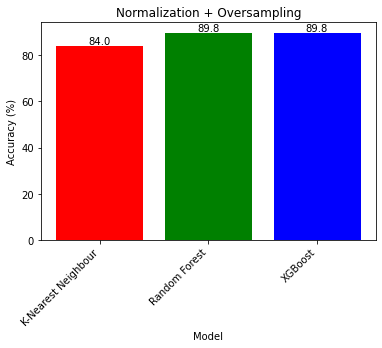

In [106]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [107]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                                      'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
                                        accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,90.9
1,Random Forest,89.3
2,XGBoost,87.2


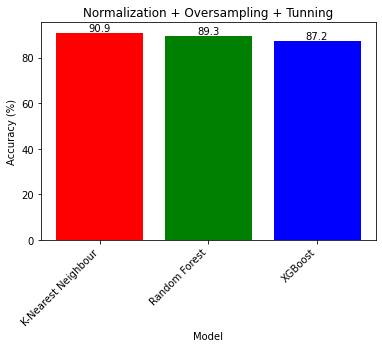

In [108]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [109]:
# Data frame
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
              'XGB OverSample Standarization Tunning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100,
                 accuracy_xgb_smote_normal_Tun*100]
})

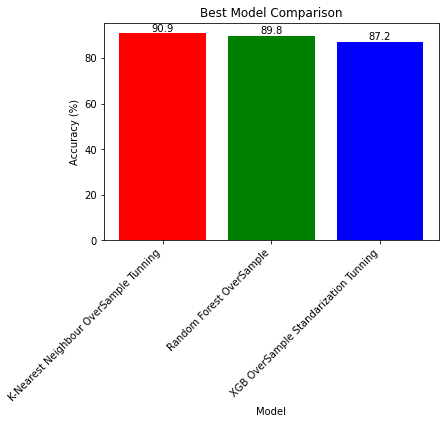

In [110]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# Kesimpulan

ada beberapa kesimpulan yang dapat ditarik untuk dianalisis sebagai berikut:

- jika suatu kolom bertipe data numerik dan memiliki sejumlah missing value maka kita dapat menggisi atau menggantinya dengan nilai rata-rata dari kolom tersebut

- normalisasi atau standarisasi pada tahap pemprosesan data tidak cukup untuk menangani imbalance data karena menghasilkan akurasi rendah. dapat dilihat bahwa hasil akurasi KNN 74%, Random forest 90%, XGBoost 90%.

- jika kita menemui imbalance data, kita perlu melakukan analisis apakah data tersebut terlalu sedikit ataukah data tersebut terlalu banyak. jika data terlalu sedikit maka perlu dilakukan oversampling dengan menggunakan SMOTE. Sedangkan jika data terlalu banyak maka perlu dilakukan undersampling.

- penerapan SMOTE menunjukan hasil akurasi yang lebih baik dibandingkan data yang hanya dilakukan normalisasi saja. dapat dilihat bahwa hasil akurasi knn 84%, random forest 90% dan xgboost 90%.

- selain penerapan SMOTE, kita juga dapat menerapkan tuning pada model. tujuan tuning yaitu untuk menemukan kombinasi hyperparameter terbaik yang menghasilkan model dengan kinerja prediksi tertinggi. dapat dilihat bahwa hasil akurasi knn 94%, random forest 89% dan xgboost 86%.

- confussion matrix merupakan alat evaluasi kinerja model klasifikasi pada machine learning

# Deployment

In [111]:
import pickle

In [ ]:
# Simpan model ke dalam file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
